In [1]:
#Importando as bibliotecas
from kafka import KafkaConsumer
import json
from json import loads
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
#Consuma todas as mensagens do tópico, mas não marque como 'lidas' (enable_auto_commit=False)
#para que possamos relê-los quantas vezes quisermos.
consumer = KafkaConsumer('Food',
                         group_id = 'food-consumer-group',
                         bootstrap_servers=['localhost:9092'],
                         value_deserializer=lambda m: json.loads(m.decode('utf-8')),
                         auto_offset_reset ='earliest',
                         enable_auto_commit=False,
                         consumer_timeout_ms = 1000
                         )

In [3]:
#Concatenar todas as linhas, normalizando o json
lista = []

for message in consumer:
    global combined
    data = pd.json_normalize(message.value)
    lista.append(data)
    
Conjunto = pd.concat(lista)

In [13]:
#Visualizar os 20 primeiras linhas
Conjunto.head(20)

,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
0,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
0,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
0,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
0,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
0,FPS006,Male,Indian,24,Traditional food,Fresh Juice,Yes
0,FPS007,Female,Indian,34,Traditional food,Fresh Juice,Yes
0,FPS008,Male,Pakistani,24,Western Food,Carbonated drinks,Yes
0,FPS009,Female,Indian,19,Traditional food,Fresh Juice,Yes
0,FPS010,Female,Indian,16,Western Food,Fresh Juice,Yes


In [5]:
#Obter informaçães do Dataframe
Conjunto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 0
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Participant_ID  289 non-null    object
 1   Gender          289 non-null    object
 2   Nationality     289 non-null    object
 3   Age             289 non-null    object
 4   Food            289 non-null    object
 5   Juice           289 non-null    object
 6   Dessert         289 non-null    object
dtypes: object(7)
memory usage: 18.1+ KB


In [14]:
#Converter as colunas Age e Nationality
Conjunto['Age'] = pd.to_numeric(Conjunto['Age'])



In [16]:
#Obter informaçães do Dataframe
Conjunto.head(10)

,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
0,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
0,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
0,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
0,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
0,FPS006,Male,Indian,24,Traditional food,Fresh Juice,Yes
0,FPS007,Female,Indian,34,Traditional food,Fresh Juice,Yes
0,FPS008,Male,Pakistani,24,Western Food,Carbonated drinks,Yes
0,FPS009,Female,Indian,19,Traditional food,Fresh Juice,Yes
0,FPS010,Female,Indian,16,Western Food,Fresh Juice,Yes


In [31]:
#Soma das quantidades por nacionalidade
summary_quant = Conjunto.groupby('Gender')['Age'].count()
print(summary_quant)


Gender
Female    166
Male      123
Name: Age, dtype: int64


In [32]:
Ticket = summary_quant
print(Ticket)

Gender
Female    166
Male      123
Name: Age, dtype: int64


In [33]:
#Importar a blioteca matplot
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Gender'>

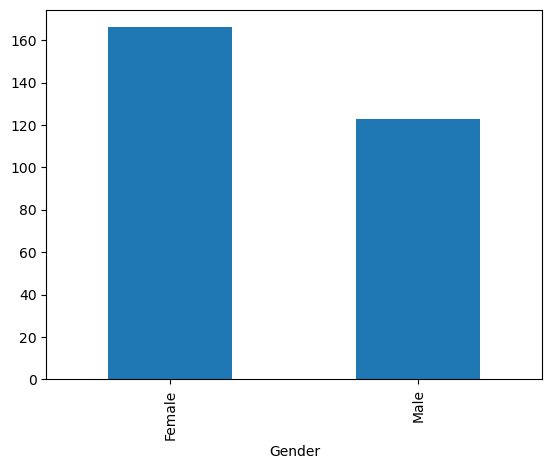

In [34]:
#Gerar um gráfico de barras
Ticket.plot.bar()

<AxesSubplot:ylabel='Age'>

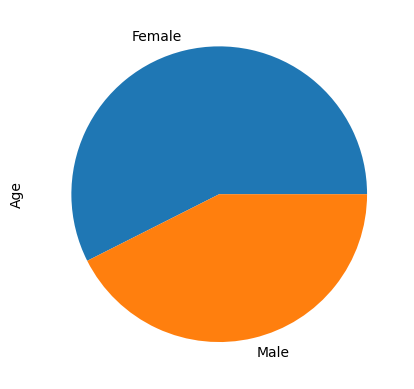

In [35]:
#Gerar um gráfico de pizza
Ticket.plot.pie()

<AxesSubplot:xlabel='Gender'>

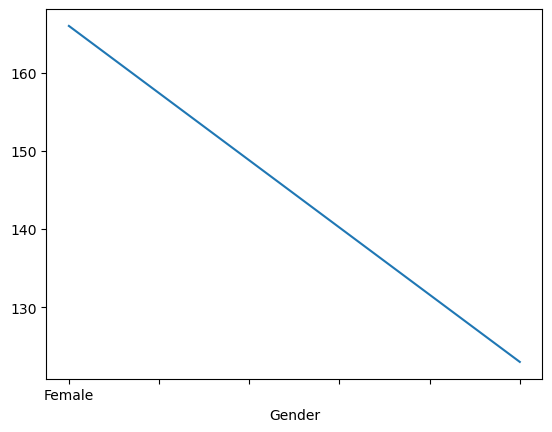

In [47]:
#Gera um gráfico de linha
summary_quant.plot.line()